# Comparison: Madelon
https://archive.ics.uci.edu/ml/datasets/madelon

In [1]:
from google.colab import drive
import sys
import os

drive.mount('/content/drive/')
sys.path.append('/content/drive/MyDrive/Project/EDQC/dqc')

Mounted at /content/drive/


## Initialization

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from utils.visualization import animator


## Reading Data

In [6]:
data1 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/madelon/MADELON/madelon_test.data', header=None, sep=' ')
data2 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/madelon/MADELON/madelon_train.data', header=None, sep=' ')
data3 = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/madelon/MADELON/madelon_valid.data', header=None, sep=' ')


label = 'madelon'

In [7]:
data1

,0,1,2,3,4,5,6,7,8,9,...,491,492,493,494,495,496,497,498,499,500
0,483,460,559,477,462,491,499,475,495,479,...,480,546,630,434,497,479,503,465,494,NaN
1,484,509,538,473,548,497,551,477,498,471,...,482,493,442,440,587,475,483,509,455,NaN
2,476,529,558,477,505,486,545,477,473,480,...,482,465,389,460,459,484,476,564,521,NaN
3,487,475,480,494,477,472,512,477,486,480,...,476,536,622,523,445,481,490,481,548,NaN
4,486,490,480,471,520,481,437,476,484,482,...,473,474,491,516,515,475,497,453,497,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,483,502,484,476,508,473,472,475,502,484,...,474,530,548,553,514,480,486,536,466,NaN
1796,481,469,473,493,507,485,470,480,486,488,...,478,478,505,464,548,478,490,515,514,NaN
1797,479,499,538,462,481,476,472,474,465,475,...,480,492,458,503,590,472,474,482,446,NaN
1798,481,499,493,490,495,482,478,478,469,473,...,483,509,571,523,514,478,491,534,494,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   1       178 non-null    float64
 1   2       178 non-null    float64
 2   3       178 non-null    float64
 3   4       178 non-null    float64
 4   5       178 non-null    int64  
 5   6       178 non-null    float64
 6   7       178 non-null    float64
 7   8       178 non-null    float64
 8   9       178 non-null    float64
 9   10      178 non-null    float64
 10  11      178 non-null    float64
 11  12      178 non-null    float64
 12  13      178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [ ]:
data

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
classes = data[0]
data.drop(0, axis=1, inplace=True)

In [ ]:
classes.value_counts()

2    71
1    59
3    48
Name: 0, dtype: int64

In [ ]:
data.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
for col in data.columns:
  print(col, data[col].min(), data[col].max())

1 11.03 14.83
2 0.74 5.8
3 1.36 3.23
4 10.6 30.0
5 70 162
6 0.98 3.88
7 0.34 5.08
8 0.13 0.66
9 0.41 3.58
10 1.28 13.0
11 0.48 1.71
12 1.27 4.0
13 278 1680
class 1 3


## Exploratory Data Analysis

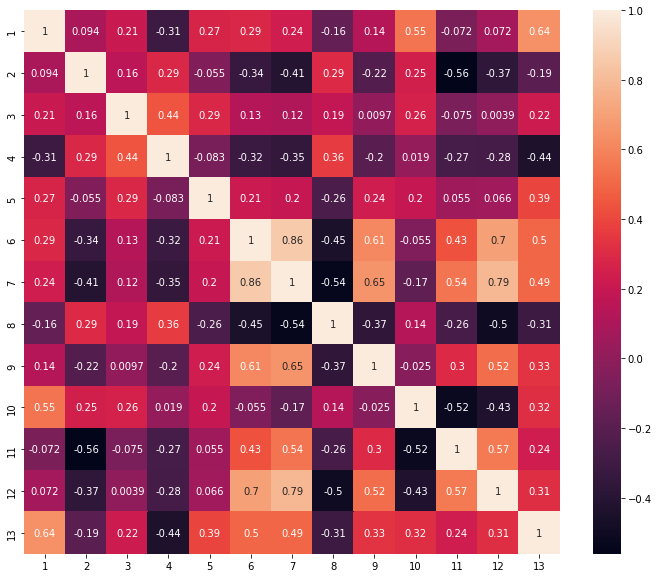

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(), annot=True)

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=6, random_state=0)
df = pd.DataFrame(pca.fit_transform(data))

df['class'] = classes

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


In [ ]:
data['class'] = classes

In [ ]:
classes.value_counts()

2    71
1    59
3    48
Name: 0, dtype: int64

In [ ]:
sns.pairplot(data, hue='class', palette={1: 'orange', 2:'blue', 3: 'green'})

Output hidden; open in https://colab.research.google.com to view.

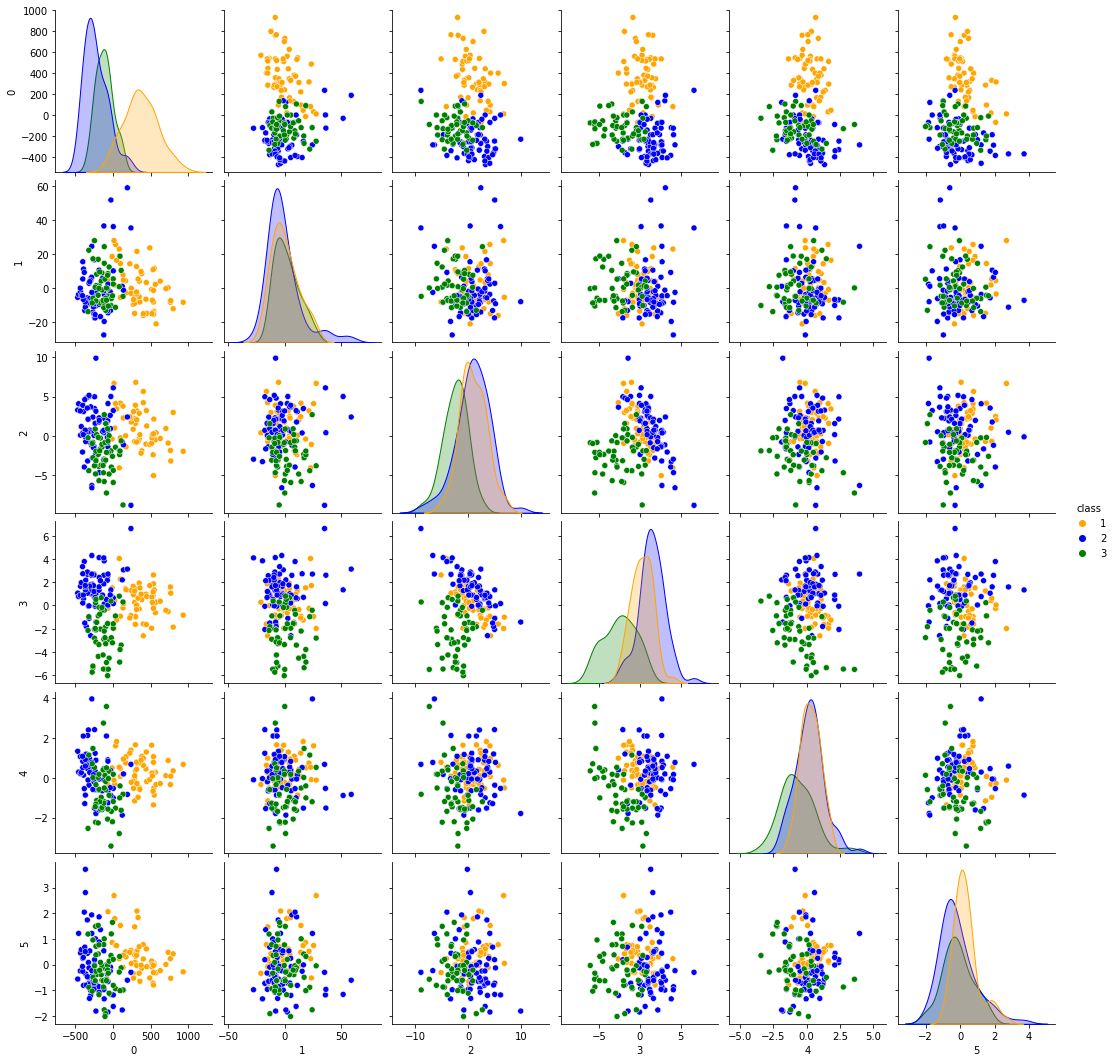

In [ ]:
sns.pairplot(df, hue='class', palette={1: 'orange', 2:'blue', 3: 'green'})

In [ ]:
classes

0      1
1      1
2      1
3      1
4      1
      ..
173    3
174    3
175    3
176    3
177    3
Name: 0, Length: 178, dtype: int64

Text(0.5, 0.92, '3D plot of KMeans Clustering')

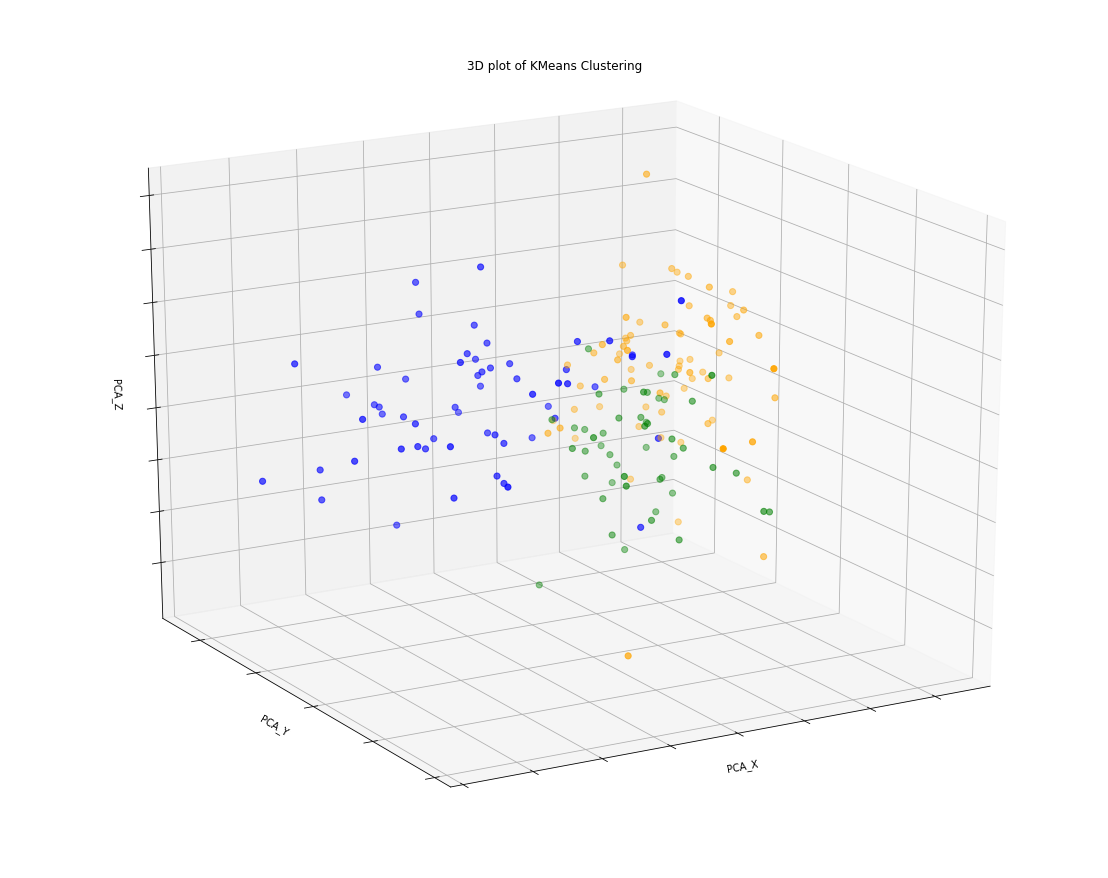

In [ ]:
fig = plt.figure(figsize=(16, 12))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=60)
labels = classes.apply(lambda r: ['blue', 'orange', 'green'][int(r)-1])
ax.scatter(df[0], df[1], df[2], c=labels, marker='.', s=150)
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('PCA_X')
ax.set_ylabel('PCA_Y')
ax.set_zlabel('PCA_Z')
ax.set_title('3D plot of KMeans Clustering')


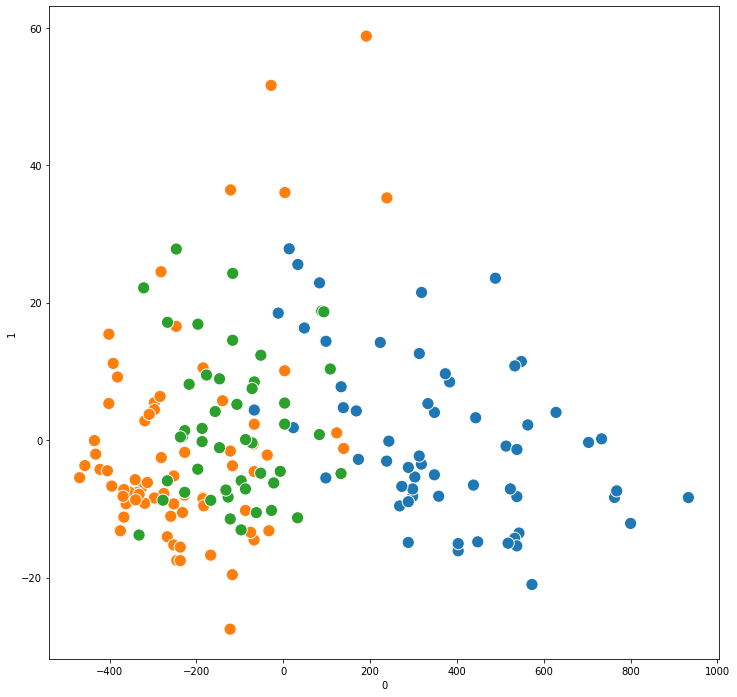

In [ ]:
plt.figure(figsize=(12,12))
sns.scatterplot(x=df[0], y=df[1], hue=labels, legend=False, s=150)
# plt.scatter(self.centroids[:, 0], self.centroids[:, 1], marker='x', s=150, c='black')

## 

In [ ]:
from   model.dqc import DQC
import model.base_dqc as dqc

In [ ]:
def run_model(df, SIGMA = 0.01, M = 0.07):
  edqc = DQC(df)
  edqc.calculate_N(SIGMA)
  N = np.array(edqc.N)
  data_fit = np.array(edqc.data_fit)
  H = dqc.calculate_H(data_fit,SIGMA,M)
  H = dqc.basis_transform(H,N)
  H = (np.abs(H) <= 1) * 1 + (np.abs(H) > 1) * -1
  X = dqc.calculate_X(data_fit,M)
  X = dqc.basis_transform(X,N,is_expectation=True)

  P,H = dqc.diagonalize_H(H)

  H = np.round(H, 4)

  # H = H < -4

  traj,N_traj = dqc.trajectory(df,P,H,X,N,steps=10000,delta=10**4,sigma=SIGMA,m=M,stride=50)
  S = dqc.reverse_entropy(traj, N_traj)

  return N, H, X , P, traj, N_traj, S

In [ ]:
N, H, X , P, traj, N_traj, S = run_model(df, SIGMA = 0.01, M = 0.05)

/content/drive/MyDrive/Project/EDQC/dqc/model/base_dqc.py:229: ComplexWarning: Casting complex values to real discards the imaginary part
  H_diag[i] = evals[i] * H_diag[i]
/content/drive/MyDrive/Project/EDQC/dqc/model/base_dqc.py:391: RuntimeWarning: divide by zero encountered in double_scalars
  S[step] = S[step] - 1/p * np.log(1/p)


Text(0, 0.5, 'Reverse Entropy (1/S)')

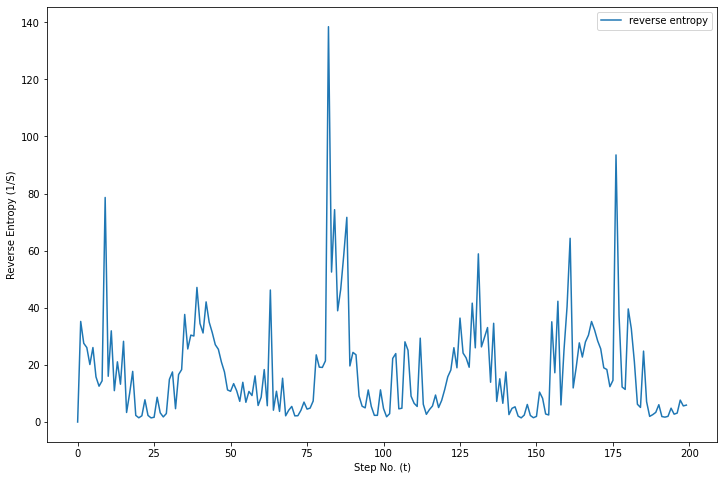

In [ ]:
ax = pd.DataFrame(1/S, columns=['reverse entropy']).plot(figsize=(12,8), )
ax.set_xlabel("Step No. (t)")
ax.set_ylabel("Reverse Entropy (1/S)")

In [ ]:
np.where((1/S).max() == 1/S)

(array([82]),)

In [ ]:
classes.value_counts()

2    71
1    59
3    48
Name: 0, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

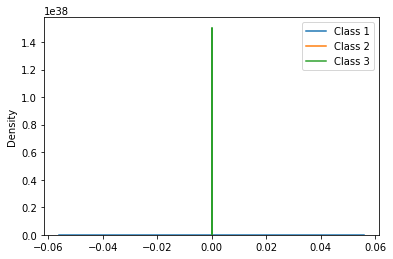

In [ ]:
# sns.distplot(H.diagonal(), hist=False, label='All states')
HH = H.diagonal()
c = classes.reset_index(drop=True)
la = list(c[c == 1].index)
lb = list(c[c == 2].index)
lc = list(c[c == 3].index)
sns.distplot(HH[la],hist=False, label='Class 1')
sns.distplot(HH[lb],hist=False, label='Class 2')
sns.distplot(HH[lc],hist=False, label='Class 3')
plt.legend()

In [ ]:
np.round(HH,5)

array([-0.04483,  0.04477, -0.00027,  0.00027, -0.00012,  0.00012,
        0.     , -0.     ,  0.     , -0.     ,  0.     , -0.     ,
        0.     , -0.     , -0.     , -0.     ,  0.     ,  0.     ,
        0.     ,  0.     , -0.     , -0.     ,  0.     , -0.     ,
       -0.     ,  0.     ,  0.     , -0.     ,  0.     , -0.     ,
        0.     , -0.     ,  0.     , -0.     ,  0.     , -0.     ,
        0.     , -0.     ,  0.     ,  0.     , -0.     , -0.     ,
       -0.     ,  0.     ,  0.     , -0.     ,  0.     , -0.     ,
       -0.     ,  0.     ,  0.     , -0.     ,  0.     , -0.     ,
       -0.     ,  0.     ,  0.     , -0.     ,  0.     , -0.     ,
        0.     , -0.     , -0.     ,  0.     , -0.     ,  0.     ,
       -0.     , -0.     ,  0.     , -0.     , -0.     ,  0.     ,
        0.     , -0.     , -0.     ,  0.     , -0.     ,  0.     ,
       -0.     , -0.     ,  0.     ,  0.     , -0.     , -0.     ,
        0.     , -0.     , -0.     , -0.     ,  0.     ,  0.  

In [ ]:
classes[classes == 3]

130    3
131    3
132    3
133    3
134    3
135    3
136    3
137    3
138    3
139    3
140    3
141    3
142    3
143    3
144    3
145    3
146    3
147    3
148    3
149    3
150    3
151    3
152    3
153    3
154    3
155    3
156    3
157    3
158    3
159    3
160    3
161    3
162    3
163    3
164    3
165    3
166    3
167    3
168    3
169    3
170    3
171    3
172    3
173    3
174    3
175    3
176    3
177    3
Name: 0, dtype: int64

In [ ]:
color_selection = [((0, 58), 'blue'), ((59, 129), 'orange'), ((130, 177), 'green')]

In [ ]:
directory = '/content/drive/MyDrive/Project/EDQC/data/uci/{}/'.format(label.lower())

if not os.path.exists(directory):
        os.mkdir(directory)
        
os.chdir(directory)

_tmp = dqc.plot_steps(traj, color_selections=color_selection)
del(_tmp)

animator()

/content/drive/MyDrive/Project/EDQC/dqc/model/base_dqc.py:336: RuntimeWarning: divide by zero encountered in reciprocal
  norm = np.sqrt(x ** 2 + y ** 2 + z ** 2) ** -1
/content/drive/MyDrive/Project/EDQC/dqc/model/base_dqc.py:339: RuntimeWarning: invalid value encountered in multiply
  ax.scatter(x * norm, y * norm, z * norm, c=col)
/content/drive/MyDrive/Project/EDQC/dqc/model/base_dqc.py:326: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>